In [90]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv("housing.csv")

In [92]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


C:\Users\kasya\AppData\Local\Temp\ipykernel_11768\1535623934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bedrooms'])


<Axes: xlabel='total_bedrooms', ylabel='Density'>

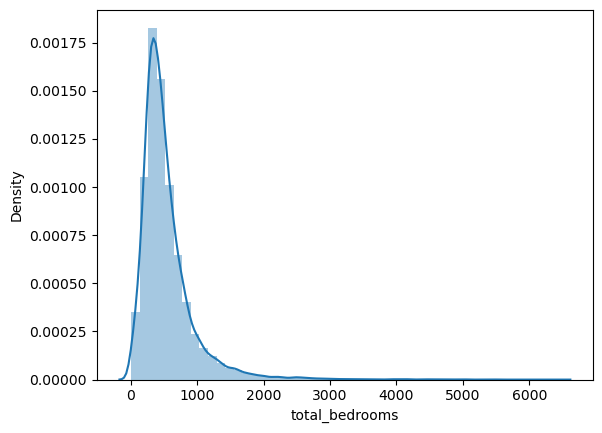

In [93]:
sns.distplot(df['total_bedrooms'])

In [94]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [95]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [96]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [97]:
encoder = LabelEncoder()
## Alphabatically assigning label
df['ocean_proximity']=encoder.fit_transform(df['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [98]:
columns_to_drop = ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms','median_income','ocean_proximity']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,total_rooms,population,households,median_house_value
0,880.0,322.0,126.0,452600.0
1,7099.0,2401.0,1138.0,358500.0
2,1467.0,496.0,177.0,352100.0
3,1274.0,558.0,219.0,341300.0
4,1627.0,565.0,259.0,342200.0


<Axes: >

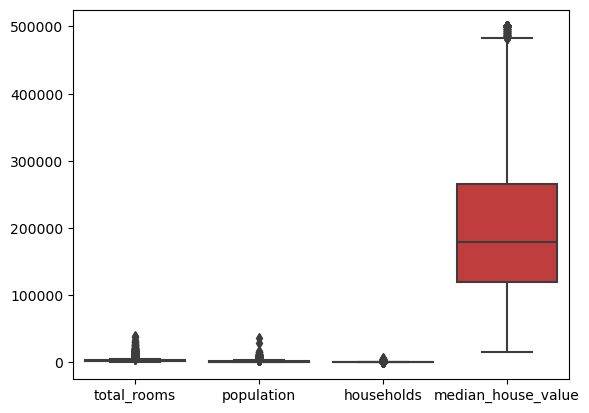

In [99]:
sns.boxplot(df)

In [100]:
from sklearn.ensemble import IsolationForest

In [101]:
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100, contamination=float(0.002),random_state=random_state)
model.fit(df)
scores = model.decision_function(df)
predictions=model.predict(df)

In [102]:
df['scores']=scores
df['anomaly_score']=predictions
df[df['anomaly_score']==-1].head()

,total_rooms,population,households,median_house_value,scores,anomaly_score
922,28258.0,12203.0,3701.0,451100.0,-0.030560,-1
1010,20354.0,8768.0,3293.0,238900.0,-0.010877,-1
4035,17377.0,7450.0,4204.0,259600.0,-0.002282,-1
6057,32054.0,15507.0,5050.0,253900.0,-0.029454,-1
6061,18690.0,9427.0,2777.0,315600.0,-0.000148,-1


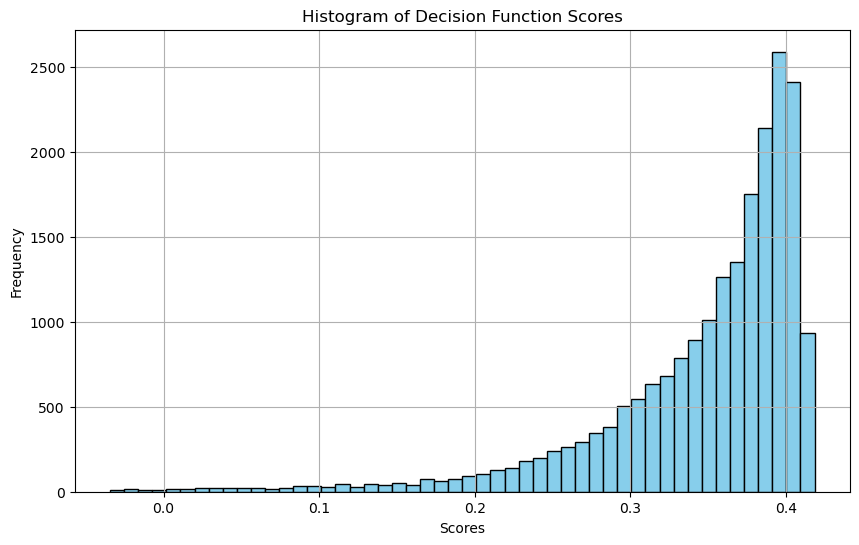

In [103]:
# Plot the scores
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Decision Function Scores')
plt.grid(True)
plt.show()

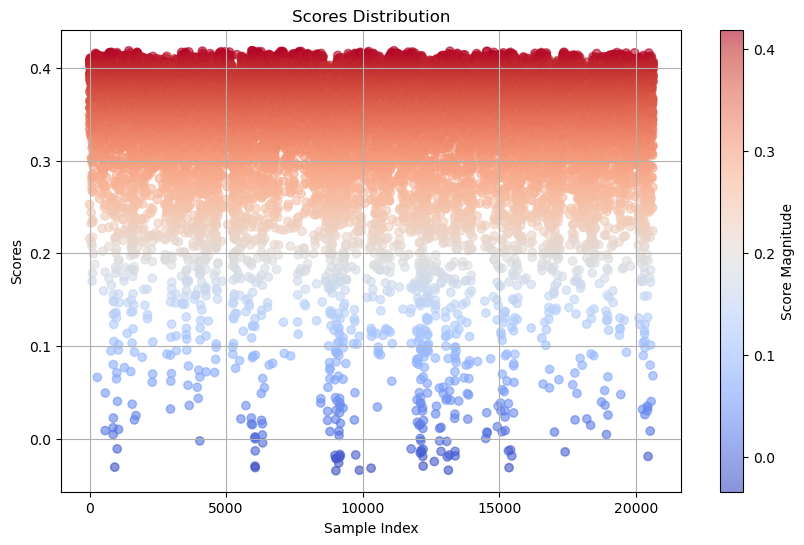

In [104]:
# Plot the scores with a gradient colormap
plt.figure(figsize=(10, 6))
plt.scatter(range(len(scores)), scores, c=scores, cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Score Magnitude')
plt.xlabel('Sample Index')
plt.ylabel('Scores')
plt.title('Scores Distribution')
plt.grid(True)
plt.show()

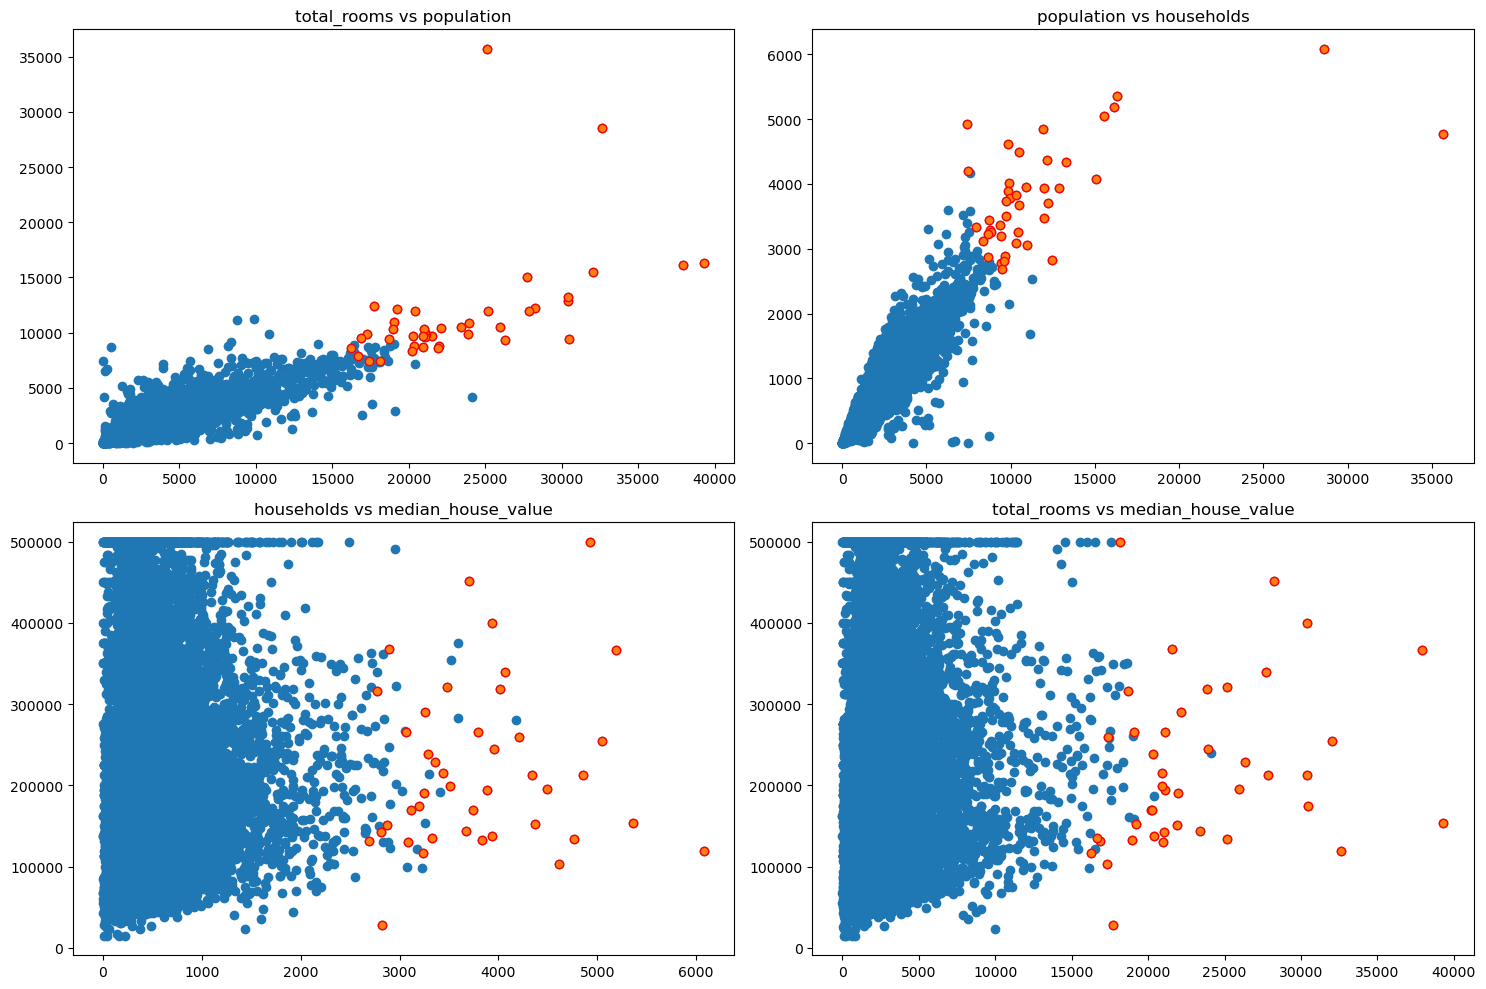

In [105]:
index=np.where(predictions<0)
x=df.values
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot for the first two features (subplot 1)
axes[0, 0].scatter(df.iloc[:, 0], df.iloc[:, 1])
axes[0, 0].scatter(x[index, 0], x[index, 1], edgecolors="r")
axes[0, 0].set_title('total_rooms vs population')

# Scatter plot for the second and third features (subplot 2)
axes[0, 1].scatter(df.iloc[:, 1], df.iloc[:, 2])
axes[0, 1].scatter(x[index, 1], x[index, 2], edgecolors="r")
axes[0, 1].set_title('population vs households')

# Scatter plot for the third and fourth features (subplot 3)
axes[1, 0].scatter(df.iloc[:, 2], df.iloc[:, 3])
axes[1, 0].scatter(x[index, 2], x[index, 3], edgecolors="r")
axes[1, 0].set_title('households vs median_house_value')

# Scatter plot for the fourth and fifth features (subplot 4)
axes[1, 1].scatter(df.iloc[:, 0], df.iloc[:, 3])
axes[1, 1].scatter(x[index, 0], x[index, 3], edgecolors="r")
axes[1, 1].set_title('total_rooms vs median_house_value')


plt.tight_layout()
plt.show()